In [1]:
from geostatsmodels import utilities, variograms, model, kriging, geoplot
import pandas as pd
import numpy as np

In [8]:
x = [  1.30200100e-01,   4.91200100e-01,  -4.57799900e-01,
        -6.18799900e-01,   3.80200100e-01,  -6.61799900e-01,
        -5.84799900e-01,   7.76200100e-01,  -8.75799900e-01,
        -7.95799900e-01,  -6.31799900e-01,  -5.21799900e-01,
        -3.78799900e-01,   2.42200100e-01,  -1.18779990e+00,
         1.12620010e+00,   3.95200100e-01,   1.18120010e+00,
         5.40200100e-01,  -2.61799900e-01,  -1.15379990e+00,
        -1.40879990e+00,  -1.06279990e+00,  -1.33979990e+00,
        -1.54579990e+00,   5.02001000e-02,   9.32200100e-01,
         1.64520010e+00,   1.65220010e+00,  -1.97279990e+00,
        -9.81799900e-01,  -1.97079990e+00,  -5.37799900e-01,
        -2.13779990e+00,   1.58200100e-01,  -4.52799900e-01,
        -1.98979990e+00,  -2.07979990e+00,   1.65720010e+00,
        -2.22979990e+00,  -3.94799900e-01,  -2.02079990e+00,
        -5.64799900e-01,   2.66020010e+00,  -2.74479990e+00,
        -2.10479990e+00,  -1.43379990e+00,  -2.94279990e+00,
        -2.02079990e+00,   1.37120010e+00,  -2.55679990e+00,
        -9.77799900e-01,  -2.33379990e+00,   1.49120010e+00,
        -3.96779990e+00,   2.00420010e+00,  -3.73879990e+00,
        -4.37379990e+00,  -4.60979990e+00,   3.12320010e+00,
        -5.38879990e+00,   2.55720010e+00,   2.92001000e-02,
        -5.79279990e+00,  -6.64779990e+00,   3.03520010e+00,
        -6.90579990e+00,   4.24820010e+00,   2.51200100e-01,
         2.34200100e-01,  -4.99379990e+00,   1.00020010e+00,
        -7.92799900e-01,   6.06720010e+00,   8.27120010e+00,
         4.24720010e+00,  -5.94779990e+00,   9.41020010e+00,
        -4.27679990e+00,  -5.78879990e+00,  -6.40479990e+00,
        -9.67779990e+00,  -6.25479990e+00,  -9.63879990e+00,
         1.07722001e+01,   1.60520010e+00,   1.08352001e+01,
        -9.80779990e+00,   9.56200100e-01,  -1.26147999e+01,
        -1.04227999e+01,   8.04420010e+00,   3.85920010e+00,
         1.25602001e+01,   1.31152001e+01,  -6.18879990e+00,
         1.53042001e+01,  -8.88979990e+00,  -1.13307999e+01,
         5.80420010e+00,   1.80322001e+01,   1.49812001e+01,
         1.63162001e+01,  -1.80879990e+00,  -3.21179990e+00,
         2.06892001e+01,   6.90820010e+00,   2.20652001e+01,
        -1.37847999e+01,   1.82202001e+01,   2.14232001e+01,
         8.93520010e+00,   1.78322001e+01,  -2.54279990e+00,
         1.68642001e+01,   8.36720010e+00,   2.09122001e+01,
         2.98120010e+00,  -5.87999000e-02,   2.70792001e+01,
         2.73452001e+01,   1.15720010e+00,   3.50902001e+01,
         6.05920010e+00,  -1.91377999e+01,  -2.09537999e+01,
        -1.38837999e+01,   3.70412001e+01,   1.84742001e+01,
        -8.66799900e-01,   2.76620010e+00,   3.82282001e+01,
        -2.39127999e+01,  -4.18697999e+01,   4.69012001e+01,
        -3.87847999e+01,  -4.05187999e+01,  -4.49027999e+01,
         2.73082001e+01,   2.76172001e+01,  -4.48857999e+01,
         2.75482001e+01,   2.84342001e+01,  -5.14217999e+01,
        -2.10097999e+01,   2.68982001e+01,  -5.31677999e+01,
         3.05852001e+01,  -5.60627999e+01,   3.16792001e+01,
        -5.58907999e+01,  -5.74937999e+01,   3.08012001e+01,
         2.78572001e+01,  -5.65717999e+01,   2.82502001e+01,
         2.43762001e+01,   3.57562001e+01,   4.33262001e+01,
         3.54442001e+01,  -6.34857999e+01,   3.28232001e+01,
        -6.94837999e+01,  -2.78627999e+01,  -3.42547999e+01,
         5.34172001e+01,  -1.86627999e+01,  -2.58987999e+01,
        -2.70087999e+01,  -3.36007999e+01,  -3.27017999e+01,
         2.07982001e+01,   1.04192001e+01,  -5.43837999e+01,
        -5.42867999e+01,  -8.09079990e+00,  -7.42779990e+00,
        -1.84827999e+01,  -1.81167999e+01,  -6.95247999e+01,
        -5.50097999e+01,  -2.75857999e+01,  -4.86679990e+00,
        -9.95567999e+01,  -6.31687999e+01,  -5.53107999e+01,
         1.24912001e+01,  -5.89627999e+01,  -8.30157999e+01,
        -4.70197999e+01,  -1.68687999e+01,  -3.43967999e+01,
         4.87820010e+00,  -7.00337999e+01,  -5.21037999e+01,
         1.25182001e+01,  -1.28585800e+02,  -4.32167999e+01,
        -1.03195800e+02,   1.57812001e+01,  -3.66387999e+01,
        -1.30845800e+02,  -8.77597999e+01,   3.27220010e+00,
        -4.35207999e+01,   1.91032001e+01,   8.20010000e-03,
        -2.37879990e+00,  -2.66507999e+01,  -6.84537999e+01,
        -1.01541800e+02,  -1.33757800e+02,  -1.57227999e+01,
        -5.68097999e+01,  -6.94757999e+01,  -2.76087999e+01,
         2.81952001e+01,  -4.81927999e+01,  -6.71717999e+01,
        -6.01627999e+01,  -2.47999000e-02,  -6.31627999e+01,
         1.32212001e+01,  -9.94507999e+01,  -1.61397999e+01,
         7.92020010e+00,  -4.32837999e+01,  -5.53977999e+01,
        -3.77727999e+01,  -1.67897999e+01,  -4.39887999e+01,
        -3.18457999e+01,  -6.39727999e+01,   1.05572001e+01,
         3.58742001e+01,   3.67712001e+01,   1.08042001e+01,
         6.15372001e+01,   3.44422001e+01,   6.40142001e+01,
        -1.32407999e+01,  -2.47547999e+01,   1.07684200e+02,
         2.67382001e+01,   9.82320010e+00,   7.66662001e+01,
        -3.54847999e+01,   4.87432001e+01,   7.25462001e+01,
        -1.83817999e+01,  -4.00279990e+00,  -3.04979990e+00,
         2.79002001e+01,   7.80952001e+01,   4.63392001e+01,
         2.79762001e+01,  -4.55179990e+00,   8.57620010e+00,
        -3.99507999e+01,  -3.23107999e+01,   7.31420010e+00,
         4.73952001e+01,   5.70802001e+01,   4.99332001e+01,
        -2.27507999e+01,  -2.14457999e+01,  -2.14627999e+01,
        -2.96587999e+01,   3.01120010e+00,  -5.00879990e+00,
         3.40862001e+01,  -2.54557999e+01,  -5.26799900e-01,
         7.65372001e+01,  -9.34427999e+01,   9.72001000e-02,
        -8.34799900e-01,   8.42002001e+01,   1.47062001e+01,
        -2.63727999e+01,   9.08362001e+01,  -2.37887999e+01,
         1.67420010e+00,  -3.69527999e+01,   6.67642001e+01,
         1.52292001e+01,  -3.74127999e+01,   1.25288200e+02,
        -3.13327999e+01,  -4.51577999e+01,   2.31022001e+01,
         3.05522001e+01,  -3.63617999e+01,   6.87572001e+01,
        -1.01716800e+02,   1.70502001e+01,   4.25042001e+01,
        -2.54767999e+01]
y = [-9.15910800e-02,  -3.55910800e-02,   3.62408920e-01,
        -1.52591080e-01,  -5.31591080e-01,  -1.08591080e-01,
        -3.86591080e-01,  -2.87591080e-01,   4.90408920e-01,
        -6.57591080e-01,  -8.78591080e-01,   1.00040892e+00,
        -1.15059108e+00,  -1.21759108e+00,  -4.02591080e-01,
         6.92408920e-01,   1.28640892e+00,  -6.71591080e-01,
        -1.24959108e+00,  -1.36659108e+00,   8.23408920e-01,
        -4.01591080e-01,  -1.12459108e+00,  -7.85591080e-01,
        -2.33591080e-01,   1.57140892e+00,  -1.32759108e+00,
         3.74089200e-02,   5.79408920e-01,   2.10408920e-01,
         1.74840892e+00,  -3.89591080e-01,  -1.95159108e+00,
         7.99408920e-01,  -2.29659108e+00,  -2.35859108e+00,
        -1.38459108e+00,   1.40040892e+00,  -1.94559108e+00,
        -1.26559108e+00,  -2.72759108e+00,  -1.91959108e+00,
        -2.74259108e+00,   9.72408920e-01,  -1.10659108e+00,
        -2.13059108e+00,  -2.65259108e+00,   9.33408920e-01,
         2.41540892e+00,   3.07140892e+00,  -2.33759108e+00,
        -3.49859108e+00,  -2.88659108e+00,   3.41940892e+00,
        -8.98591080e-01,   3.73040892e+00,  -2.55759108e+00,
        -1.33959108e+00,  -1.65259108e+00,   3.83140892e+00,
        -1.90059108e+00,   5.29340892e+00,  -6.00459108e+00,
        -2.89959108e+00,  -3.86591080e-01,   6.21340892e+00,
         5.21408920e-01,   5.71440892e+00,   7.47140892e+00,
        -7.77859108e+00,  -6.05259108e+00,   7.82740892e+00,
        -8.17059108e+00,   5.81740892e+00,   2.66840892e+00,
         7.95340892e+00,  -7.13759108e+00,   2.61640892e+00,
        -8.88859108e+00,  -8.08959108e+00,  -7.72559108e+00,
        -3.03259108e+00,   8.09540892e+00,   4.69240892e+00,
         8.33408920e-01,   1.08504089e+01,   3.03040892e+00,
        -7.93259108e+00,  -1.27465911e+01,  -3.06259108e+00,
        -7.83659108e+00,   1.04644089e+01,   1.27504089e+01,
        -6.03759108e+00,   6.81640892e+00,   1.53314089e+01,
         7.24640892e+00,   1.44254089e+01,  -1.31395911e+01,
         1.73624089e+01,  -3.16259108e+00,   1.06184089e+01,
         9.03340892e+00,   2.01444089e+01,   2.05814089e+01,
        -5.44259108e+00,   2.07934089e+01,  -1.59159108e+00,
        -1.83195911e+01,   1.66884089e+01,   1.26244089e+01,
         2.39574089e+01,  -2.14105911e+01,  -2.81015911e+01,
         2.31654089e+01,   2.74194089e+01,   2.02104089e+01,
        -3.20545911e+01,  -3.43745911e+01,   2.13734089e+01,
         2.11044089e+01,  -3.48065911e+01,  -1.80059108e+00,
        -3.71945911e+01,  -3.27185911e+01,  -3.28945911e+01,
        -3.69555911e+01,  -1.39375911e+01,   3.63184089e+01,
        -4.16785911e+01,  -4.22805911e+01,   2.03334089e+01,
        -3.77815911e+01,  -1.68925911e+01,  -1.24759108e+00,
         2.94354089e+01,   2.98954089e+01,   2.33314089e+01,
        -4.47025911e+01,  -4.52565911e+01,   2.84854089e+01,
        -4.55955911e+01,  -4.62675911e+01,   1.76504089e+01,
         5.02534089e+01,  -4.81735911e+01,   1.49934089e+01,
        -4.66205911e+01,   4.62740892e+00,  -4.72625911e+01,
         1.38294089e+01,   5.34340892e+00,  -4.96915911e+01,
        -5.18145911e+01,   1.64094089e+01,  -5.20075911e+01,
        -5.41635911e+01,  -4.89555911e+01,  -4.57655911e+01,
        -5.29455911e+01,   1.75204089e+01,  -5.76525911e+01,
        -1.16559108e+00,   6.45154089e+01,  -6.43385911e+01,
        -5.53585911e+01,  -1.50534591e+02,  -1.82001591e+02,
        -1.83967591e+02,  -2.01419591e+02,  -2.11360591e+02,
        -2.16096591e+02,  -2.23104591e+02,  -2.33147591e+02,
        -2.33455591e+02,  -2.49881591e+02,  -2.51460591e+02,
        -2.51401591e+02,  -2.52541591e+02,  -2.45323591e+02,
        -2.50676591e+02,  -2.60844591e+02,  -2.70310591e+02,
        -2.52604591e+02,  -2.69900591e+02,  -2.71899591e+02,
        -2.85954591e+02,  -2.81474591e+02,  -2.93666591e+02,
        -3.07999591e+02,  -3.11604591e+02,  -3.12135591e+02,
        -3.15363591e+02,  -3.10498591e+02,  -3.15038591e+02,
        -3.19846591e+02,  -2.95170591e+02,  -3.25426591e+02,
        -3.12663591e+02,  -3.31412591e+02,  -3.29879591e+02,
        -3.05979591e+02,  -3.21324591e+02,  -3.35176591e+02,
        -3.34215591e+02,  -3.40343591e+02,  -3.42189591e+02,
        -3.45420591e+02,  -3.45699591e+02,  -3.40968591e+02,
        -3.33060591e+02,  -3.30573591e+02,  -3.60599591e+02,
        -3.56447591e+02,  -3.60312591e+02,  -3.72481591e+02,
        -3.73462591e+02,  -3.73438591e+02,  -3.74224591e+02,
        -3.84384591e+02,  -3.93612591e+02,  -3.90834591e+02,
        -3.96955591e+02,  -3.89902591e+02,  -4.04604591e+02,
        -4.10038591e+02,  -4.10175591e+02,  -4.13177591e+02,
        -4.19247591e+02,  -4.55167591e+02,  -4.85453591e+02,
        -5.27817591e+02,  -7.76603591e+02,  -8.33992591e+02,
        -8.33842591e+02,  -8.51334591e+02,  -8.66803591e+02,
        -8.71604591e+02,  -8.88919591e+02,  -8.88964591e+02,
        -8.95322591e+02,  -9.00442591e+02,  -8.94353591e+02,
        -9.01038591e+02,  -9.03265591e+02,  -9.09810591e+02,
        -9.13755591e+02,  -9.15059591e+02,  -9.13687591e+02,
        -9.17044591e+02,  -9.18935591e+02,  -9.21179591e+02,
        -9.21088591e+02,  -9.20853591e+02,  -9.23532591e+02,
        -9.26620591e+02,  -9.29168591e+02,  -9.29545591e+02,
        -9.32470591e+02,  -9.33750591e+02,  -9.38164591e+02,
        -9.40434591e+02,  -9.40407591e+02,  -9.42205591e+02,
        -9.47117591e+02,  -9.50554591e+02,  -9.50754591e+02,
        -9.50548591e+02,  -9.51654591e+02,  -9.51994591e+02,
        -9.51486591e+02,  -9.54896591e+02,  -9.55237591e+02,
        -9.53671591e+02,  -9.54564591e+02,  -9.60952591e+02,
        -9.61474591e+02,  -9.58076591e+02,  -9.65047591e+02,
        -9.65572591e+02,  -9.62336591e+02,  -9.74676591e+02,
        -9.76053591e+02,  -9.77468591e+02,  -9.77647591e+02,
        -9.80068591e+02,  -9.81351591e+02,  -9.75411591e+02,
        -9.83193591e+02,  -9.91381591e+02,  -9.96763591e+02,
        -9.99823591e+02,  -1.00323459e+03,  -1.01103959e+03,
        -1.01077959e+03,  -1.01728559e+03,  -1.02523759e+03,
        -1.08742959e+03]

z = [ 0.99910854,  0.99724207,  0.99673025,  0.99643092,  0.99634006,
        0.99624436,  0.99607423,  0.99536451,  0.99437897,  0.9942189 ,
        0.99393984,  0.99368144,  0.99321649,  0.9930479 ,  0.99297664,
        0.99259665,  0.99246383,  0.99239086,  0.9923764 ,  0.99220793,
        0.9920621 ,  0.99179644,  0.99133492,  0.99130246,  0.99124524,
        0.99119562,  1.99091575,  0.9907845 ,  0.99019523,  1.98888966,
        0.98877083,  0.98874995,  0.98866372,  0.98721869,  0.98710861,
        0.98655069,  0.98642488,  0.98595894,  0.98568804,  0.985642  ,
        0.98456631,  0.9843917 ,  0.9843192 ,  0.9841388 ,  0.98342696,
        0.9832284 ,  0.98311433,  1.98271121,  0.98236415,  0.98116389,
        0.98059977,  0.97965709,  0.97921274,  0.97910965,  0.97721763,
        0.97628562,  0.97463262,  0.97438367,  0.9725764 ,  0.97231873,
        1.96800081,  1.96707912,  0.96637389,  0.96372334,  1.96270943,
        1.96127533,  1.96121745,  1.96012514,  0.95813647,  0.95642015,
        1.95605805,  0.9558101 ,  1.9540298 ,  1.95292896,  1.9513305 ,
        0.94950817,  1.94797075,  1.94530389,  0.94476172,  1.9442943 ,
        1.94380261,  1.94320583,  1.94271056,  2.93996623,  1.93949541,
        1.93857639,  1.93699442,  1.92936028,  1.92841853,  1.92730505,
        1.92697486,  0.92608573,  1.92539876,  1.92195859,  0.91722755,
        1.90741296,  1.90517479,  1.90510999,  1.90283784,  1.89748145,
        2.89747836,  1.89716915,  1.89556025,  1.88673746,  1.88334916,
        1.88019863,  1.87729876,  2.87611385,  1.87161115,  1.86163595,
        1.86074913,  1.85681125,  2.84396177,  2.84198816,  1.839539  ,
        1.83946117,  1.83713907,  3.81971962,  1.80750201,  1.80681171,
        1.80656429,  2.8049754 ,  2.80323635,  1.78896457,  1.78773403,
        2.78159168,  1.77892582,  1.77837106,  1.77181646,  1.76654942,
        2.76272249,  2.75752305,  2.74960606,  2.74716513,  2.73726037,
        3.7273367 ,  2.71801853,  2.71662583,  2.70665088,  2.70310129,
        5.70229515,  2.70167915,  4.69588371,  1.69554646,  1.69497644,
        3.69102368,  3.69064791,  3.68775623,  3.68498069,  3.68137406,
        4.67757254,  2.6766472 ,  5.67260501,  3.67056121,  2.67013969,
        2.66856404,  2.66738198,  4.66051085,  4.64708229,  5.64319926,
        2.63118945,  2.62848806,  3.61083598,  5.60646008,  1.59182009,
        2.56920125,  2.15055248,  1.9705237 ,  0.95873801,  1.8564632 ,
        1.80229749,  5.78426719,  1.74925259,  0.65932448,  1.65776785,
        0.59992977,  1.59120648,  1.58835147,  1.58213271,  1.57208387,
        0.56280791,  1.53112441,  3.48601536,  1.47951352,  1.44771246,
        1.44617737,  5.39712721,  2.3895296 ,  1.29102083,  2.25521928,
        1.25245921,  1.24145941,  1.23375262,  3.21752688,  2.21181802,
        5.20748779,  0.19700883,  1.16161153,  1.15618017,  1.14198657,
        1.14131498,  1.13641849,  2.13467644,  3.12292165,  0.11259129,
        1.09107596,  2.08373829,  2.06559882,  2.05833801,  1.05247568,
        2.05010529,  2.00298906,  0.97872368,  1.97870067,  0.94508193,
        1.90838102,  2.90265775,  0.89140161,  0.87085013,  1.82123958,
        1.79576949,  4.78292883,  2.77581605,  0.74663841, -0.26758769,
        0.70335557,  1.69026303,  0.66550086, -0.35729622,  0.44932797,
        1.27032193,  1.03884642, -0.36371051, -0.67073269,  0.32616195,
        3.2280813 , -0.85447717,  0.10686436, -0.98168491, -0.99109205,
       -0.01435477, -1.0443837 , -1.04455333, -2.04803729, -1.05858642,
       -0.11299633,  2.8791117 , -1.1315986 , -2.13275351, -1.13648128,
       -2.14608813, -1.15863398, -2.16046188, -1.17529143, -1.17828875,
        0.80856022,  0.79659346, -0.20567686, -2.22662574, -0.23213294,
       -1.25388137, -0.2731175 ,  2.72402549, -1.28375565, -1.30538849,
       -1.32446031, -1.32558217, -2.32566262, -1.32929239,  0.6687565 ,
       -1.33174292, -1.34932067, -0.34933132, -0.35773235, -0.3711127 ,
       -1.38133454, -1.38425974, -0.38590878, -2.40489397, -0.40922304,
       -1.41303928, -2.45981438, -1.46590815, -1.47773427, -1.4875779 ,
       -0.48904668, -0.49956115, -1.5071805 , -1.50867927,  0.4425066 ,
       -1.58337515,  2.39837442, -1.62180267, -0.67489922,  0.31104578,
       -1.69759941, -1.74626237, -1.09127675]

In [9]:
xyz = pd.DataFrame({'x':x,'y':y,'z':z})

In [10]:
%matplotlib inline

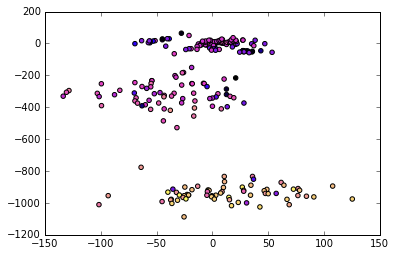

In [11]:
geoplot.scatter( x, y, c=z, cmap=geoplot.YPcmap )

In [19]:
tolerance = 1
lags = np.arange( tolerance, 60, tolerance*2 )
sill = np.var(z)

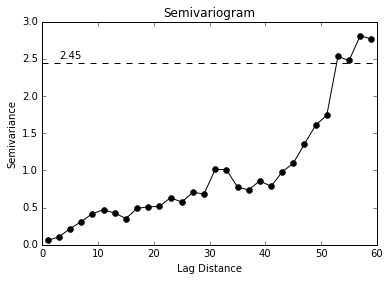

In [20]:
geoplot.semivariogram( xyz.values, lags, tolerance )

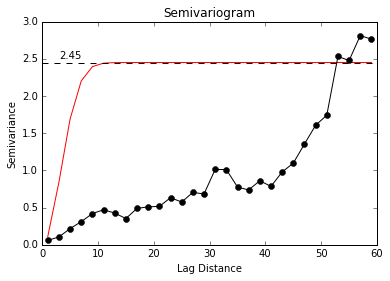

In [21]:
svm = model.semivariance( model.gaussian, ( 8, sill ) )
geoplot.semivariogram( xyz.values, lags, tolerance, model=svm )

In [118]:
covfct = model.covariance( model.gaussian, ( 8, sill ) )

In [122]:
kriging.simple( xyz.values, covfct, [-10,5], N=10 )

(3.0187062512661975, 0.060616169311874329)

In [123]:
kriging.ordinary(  xyz.values, covfct, [-10,5], N=10  )

(3.016407498243016, 0.0624696338934176)